In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("../..")

from gob.benchmarks import *
from gob.optimizers import *
import matplotlib
matplotlib.rcParams.update({"text.usetex": True})

In [2]:
class MinWrapperGrad:
  def __init__(self, func):
    self.func = func
    self.visual_bounds = func.visual_bounds
    self.values = []
    self.prev_sample = None
  
  def __call__(self, x):
    y = self.func(x)
    if self.prev_sample is None or not np.all(np.abs(x - self.prev_sample) <= 2e-9):
      self.values.append(y)
    self.prev_sample = x
    return y
  
  def get_min_per_iteration(self, n_particles):
    mins = []
    for i in range(len(self.values) // n_particles):
      prev_min = mins[-1] if mins else float("inf")
      actual_min = np.min(self.values[i * n_particles : (i + 1) * n_particles])
      mins.append(min(prev_min, actual_min))
    return mins

In [3]:
def format_results(res):
  for i in range(len(res)):
    if len(res[i]) < iter:
      print(f"Run {i} of mins_m1 has length {len(res[i])} instead of {iter}")
      # Copy the last value to extend the length
      last_value = res[i][-1]
      res[i] = list(res[i]) + [last_value] * (iter - len(res[i]))

In [28]:
g = Levy()
dim = 20
bounds = augment_dimensions(g.visual_bounds, dim)
n_particles = 150
iter = 800
sigma = 1 / n_particles ** 2
verbose = False
n_runs = 5
wrapper = MinWrapperGrad

In [29]:
mins = []
for i in range(n_runs):
  f = wrapper(g)

  opt = SBS(bounds=bounds, n_particles=n_particles, iter=iter, sigma=sigma, verbose=verbose)
  res = opt.minimize(f)
  print(f"Results for {opt}: {res[1]}")
  mins.append(f.get_min_per_iteration(n_particles)[:iter])

format_results(mins)
mins = np.array(mins)

Results for SBS: 93.27916379541337
Results for SBS: 85.98363152091252
Results for SBS: 73.84024780245396
Results for SBS: 114.88615872063667
Results for SBS: 69.9687269379811


In [6]:
mins_sigma = []
for i in range(n_runs):
  f = wrapper(g)

  opt = SBS_RKHS(bounds=bounds, n_particles=n_particles, iter=iter, sigma=sigma, sigma_noise=sigma, verbose=verbose)
  res = opt.minimize(f)
  print(f"Results for {opt}: {res[1]}")
  mins_sigma.append(f.get_min_per_iteration(n_particles)[:iter])

format_results(mins_sigma)
mins_sigma = np.array(mins_sigma)

Results for SBS-RKHS: 87.21955455798086
Results for SBS-RKHS: 98.69475617733774
Results for SBS-RKHS: 103.89437690746026
Results for SBS-RKHS: 84.470254407895
Results for SBS-RKHS: 82.93384297131662


In [7]:
mins_sigma_01 = []
for i in range(n_runs):
  f = wrapper(g)

  opt = SBS_RKHS(bounds=bounds, n_particles=n_particles, iter=iter, sigma=sigma, sigma_noise=0.1, verbose=verbose)
  res = opt.minimize(f)
  print(f"Results for {opt}: {res[1]}")
  mins_sigma_01.append(f.get_min_per_iteration(n_particles)[:iter])

format_results(mins_sigma_01)
mins_sigma_01 = np.array(mins_sigma_01)

Results for SBS-RKHS: 82.20079778584144
Results for SBS-RKHS: 80.57805001299532
Results for SBS-RKHS: 69.08141656735579
Results for SBS-RKHS: 68.96950100012502
Results for SBS-RKHS: 100.71787578083608


In [8]:
mins_sigma_1 = []
for i in range(n_runs):
  f = wrapper(g)

  opt = SBS_RKHS(bounds=bounds, n_particles=n_particles, iter=iter, sigma=sigma, sigma_noise=1, verbose=verbose)
  res = opt.minimize(f)
  print(f"Results for {opt}: {res[1]}")
  mins_sigma_1.append(f.get_min_per_iteration(n_particles)[:iter])

format_results(mins_sigma_1)
mins_sigma_1 = np.array(mins_sigma_1)

Results for SBS-RKHS: 85.11444590710475
Results for SBS-RKHS: 95.60029265187758
Results for SBS-RKHS: 91.57670681868598
Results for SBS-RKHS: 96.97458977541959
Results for SBS-RKHS: 78.38798935920391


In [9]:
mins_sigma_10 = []
for i in range(n_runs):
  f = wrapper(g)

  opt = SBS_RKHS(bounds=bounds, n_particles=n_particles, iter=iter, sigma=sigma, sigma_noise=10, verbose=verbose)
  res = opt.minimize(f)
  print(f"Results for {opt}: {res[1]}")
  mins_sigma_10.append(f.get_min_per_iteration(n_particles)[:iter])

format_results(mins_sigma_10)
mins_sigma_10 = np.array(mins_sigma_10)

Results for SBS-RKHS: 34.16032633601631
Results for SBS-RKHS: 37.00051049816829
Results for SBS-RKHS: 29.637256426101146
Results for SBS-RKHS: 24.79712091914038
Results for SBS-RKHS: 21.185798095371553


In [10]:
mins_sigma_50 = []
for i in range(n_runs):
  f = wrapper(g)

  opt = SBS_RKHS(bounds=bounds, n_particles=n_particles, iter=iter, sigma=sigma, sigma_noise=50, verbose=verbose)
  res = opt.minimize(f)
  print(f"Results for {opt}: {res[1]}")
  mins_sigma_50.append(f.get_min_per_iteration(n_particles)[:iter])

format_results(mins_sigma_50)
mins_sigma_50 = np.array(mins_sigma_50)

Results for SBS-RKHS: 13.212682163475964
Results for SBS-RKHS: 9.55229570414914
Results for SBS-RKHS: 12.937508275049646
Results for SBS-RKHS: 16.490140359416532
Results for SBS-RKHS: 15.509639516927315


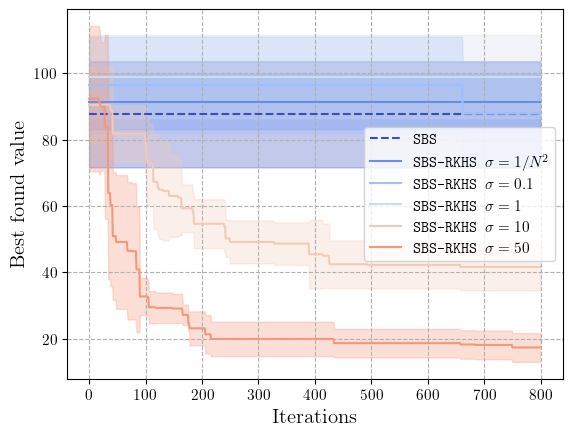

In [ ]:
latex_label = lambda s: r"\texttt{" + s.replace("_", r"\_") + "}"

cmap = matplotlib.colormaps["coolwarm"]

c0 = cmap(0)
c1 = cmap(0.15)
c2 = cmap(0.30)
c3 = cmap(0.45)
c4 = cmap(0.60)
c5 = cmap(0.75)

mean = mins.mean(axis=0)
std = mins.std(axis=0)
plt.plot(mean, label=latex_label("SBS"), linestyle="--", color=c0)
plt.fill_between(range(iter), mean - std, mean + std, alpha=0.3, color=c0)

mean = mins_sigma.mean(axis=0)
std = mins_sigma.std(axis=0)
plt.plot(mean, label=latex_label(r"SBS-RKHS $\sigma = 1 / N^2$"), linestyle="-", c=c1)
plt.fill_between(range(len(mean)), mean - std, mean + std, alpha=0.3, color=c1)

mean = mins_sigma_01.mean(axis=0)
std = mins_sigma_01.std(axis=0)
plt.plot(mean, label=latex_label(r"SBS-RKHS $\sigma = 0.1$"), linestyle="-", c=c2)
plt.fill_between(range(iter), mean - std, mean + std, alpha=0.3, color=c2)

mean = mins_sigma_1.mean(axis=0)
std = mins_sigma_1.std(axis=0)
plt.plot(mean, label=latex_label(r"SBS-RKHS $\sigma = 1$"), linestyle="-", c=c3)
plt.fill_between(range(iter), mean - std, mean + std, alpha=0.3, color=c3)

mean = mins_sigma_10.mean(axis=0)
std = mins_sigma_10.std(axis=0)
plt.plot(mean, label=latex_label(r"SBS-RKHS $\sigma = 10$"), linestyle="-", c=c4)
plt.fill_between(range(iter), mean - std, mean + std, alpha=0.3, color=c4)

mean = mins_sigma_50.mean(axis=0)
std = mins_sigma_50.std(axis=0)
plt.plot(mean, label=latex_label(r"SBS-RKHS $\sigma = 50$"), linestyle="-", c=c5)
plt.fill_between(range(iter), mean - std, mean + std, alpha=0.3, color=c5)

plt.xlabel(r"$\textrm{Iterations}$", fontsize=15)
plt.ylabel(r"$\textrm{Best found value}$", fontsize=15)
plt.grid(linestyle="--")
plt.legend(loc="right")
plt.savefig(f"sbs_vs_rkhs.pdf", bbox_inches="tight")